In [1]:
import os
import sys
notebook_directory = os.getcwd()
sys.path.append(notebook_directory)
import ExpTime_Calc as EC

# Use simplified test spectrum, filter, atmosphere

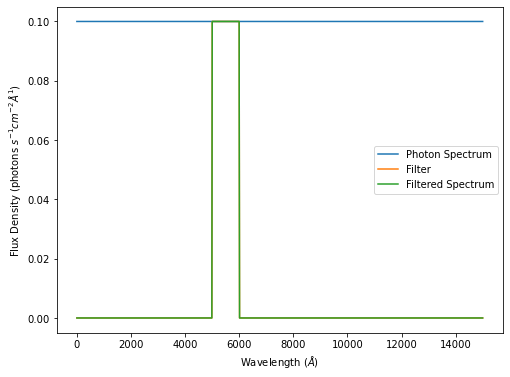

In [2]:
# Initialize testing SED with 0.1 photons/cm^2/Angstrom/second
model = EC.SED(test_spectrum=True)
wavelength,spectrum = model.photon_spectrum()

# Initialize test filter with rectangular shape from 5000-6000 Angstroms
Vband = EC.BandPass('test')
filtered_spectrum = Vband.filter_SED(wavelength, spectrum,plot=True)

In [3]:
model_SED = EC.SED(test_spectrum=True)

timstelescope = EC.Telescope(diameter=8,diameter_units='cm',focal_length=600,foc_len_units='mm') #create telescope

#simplified atmosphere with 10^-6 photons/cm^2/arcsec/Angstrom/s
LasCruces = EC.atmosphere('test',seeing=1) 

camera = EC.detector(QE=0.8,px_size=5, read_noise=5) #create detector

In [4]:
observation = EC.Observation(model_SED,                              #initialize observation
                              filter='test',telescope=timstelescope,
                              atmosphere=LasCruces,detector=camera)
counts = observation.get_counts()

4061.45 photons per second


4061.45 photons per second


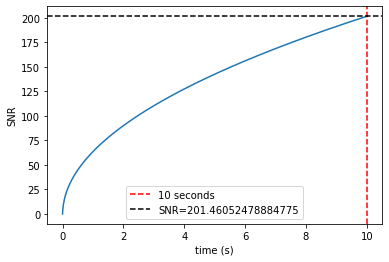

In [5]:
snr = EC.Signal_to_Noise(observation,SNR=100)


snr_value = snr.calc_SNR(10,plot=True) #calculate SNR from calculated time


In [6]:
print(counts, 'counts per second, check')
print(observation.N_px,'pixels, check')
print(observation.total_skyglow, 'photons per second, check')
print(snr_value,'SNR, check')

4061.450132604118 counts per second, check
1.063315386890785 pixels, check
0.15949290185283427 photons per second, check
201.46052478884775 SNR, check


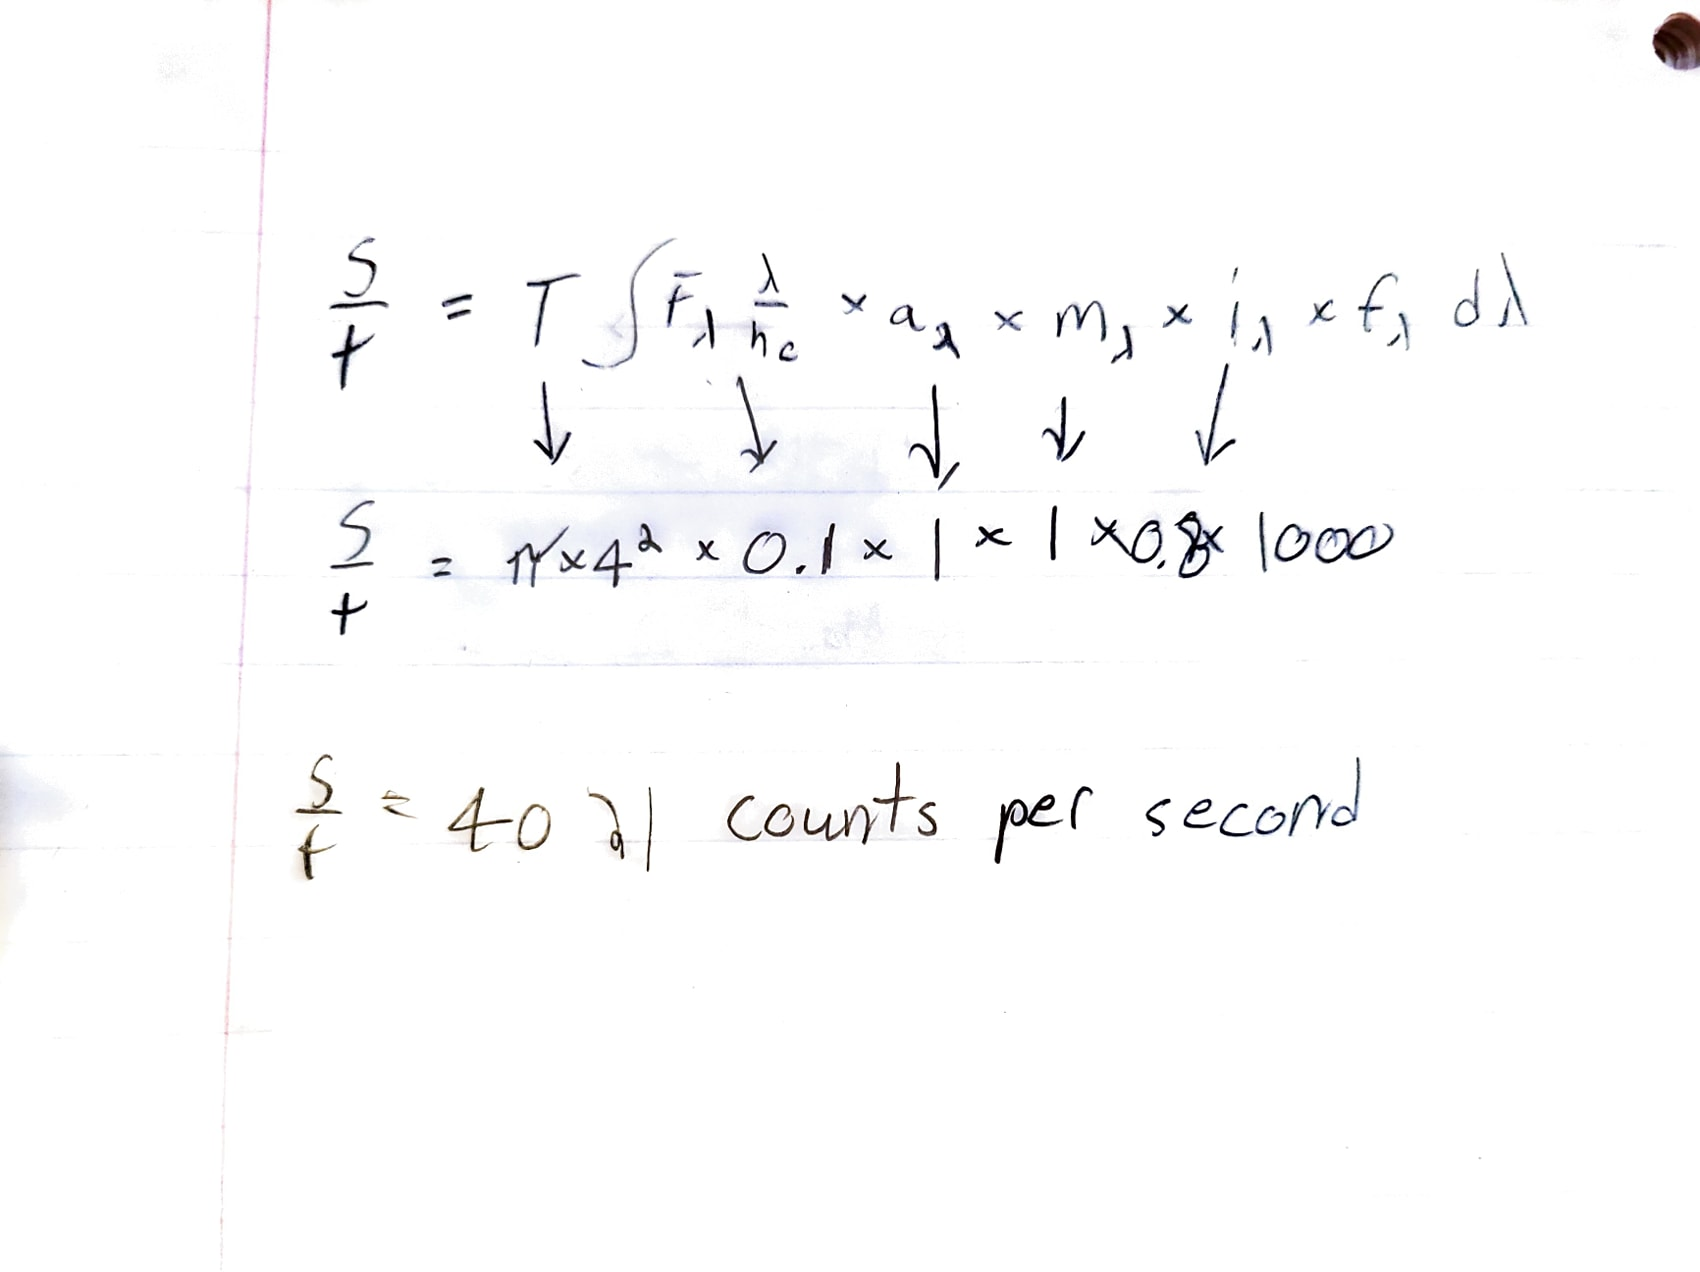

In [7]:
from IPython.display import Image
Image(filename=notebook_directory+'/test_images/test2.jpg')

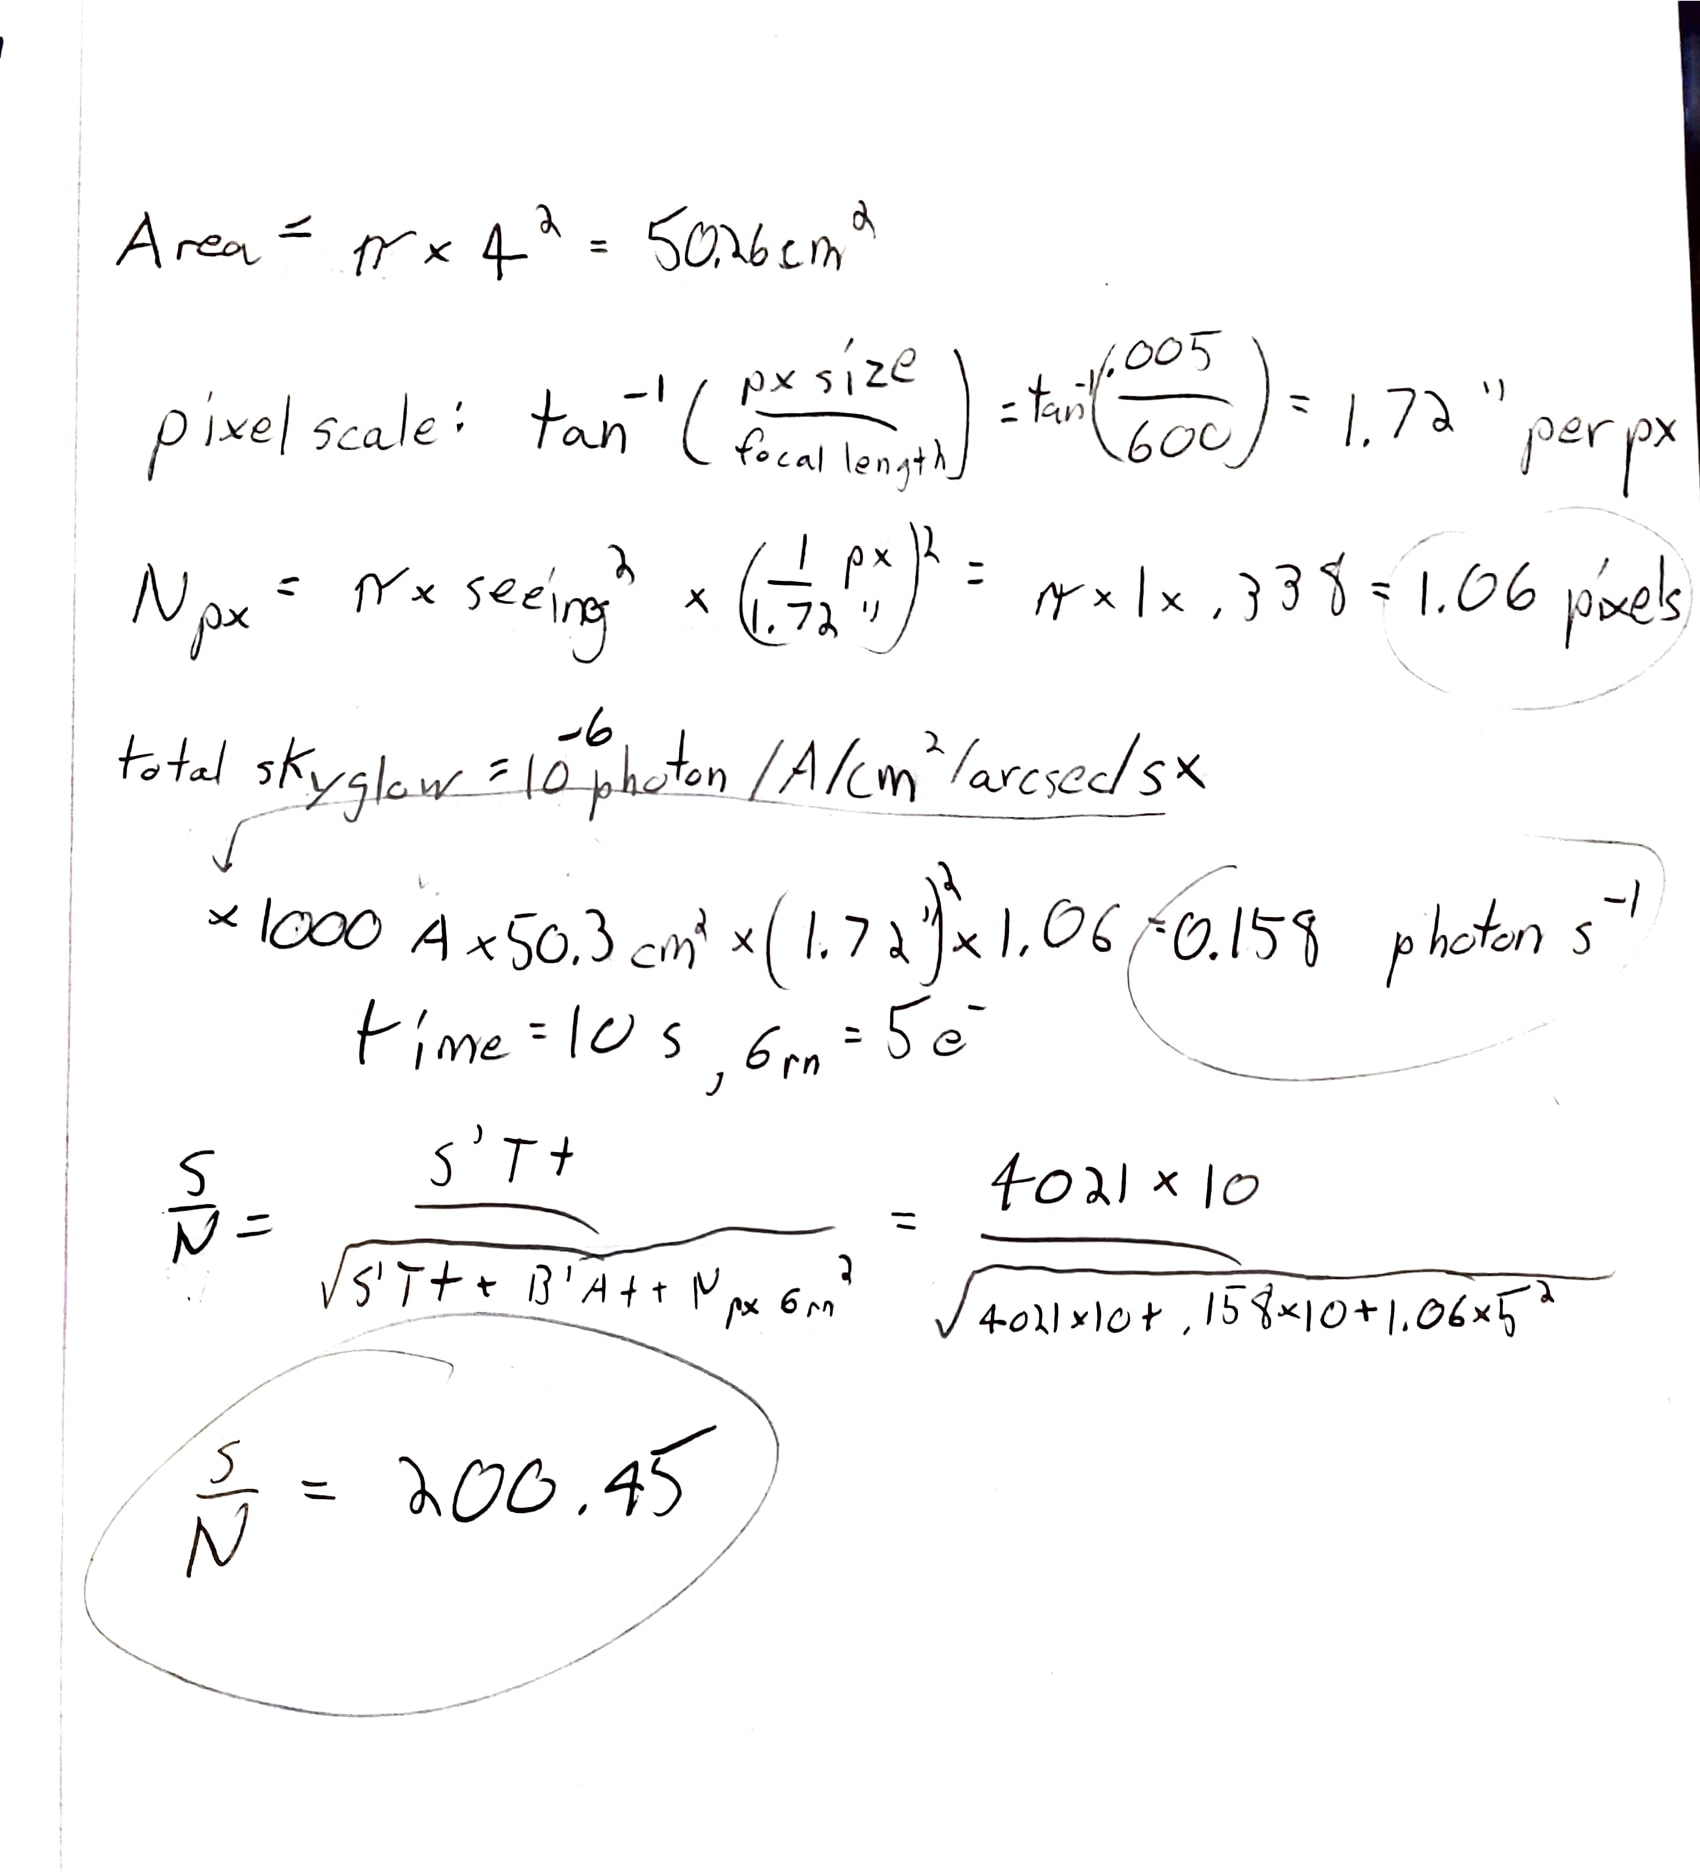

In [8]:
Image(filename=notebook_directory+'/test_images/test1.jpg')